*Trabajo Práctico 0*

*Grupo 1*

Comenzamos importando las librerías y funciones necesarias para el trabajo.

In [2]:
from src.catching import attempt_catch
from src.pokemon import PokemonFactory, StatusEffect
import json
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

Inicializamos un vector con los nombres de las pokebolas y el factory con el .json.

Adicionalmente modificamos el archivo .json con los pokemones para incluir nuevos pokemones y quitar del listado pokemones cuyos catch-rates modifican de manera desproporcionada los datos (ej: mewtwo).

In [3]:
pokeballs = ['pokeball','ultraball','fastball','heavyball']
with open('pokemon_clean.json') as f:
    pokes = json.load(f)
factory = PokemonFactory('pokemon_clean.json')

Confirmamos el listado de pokemones a estudiar.

In [4]:
aux = []
for pok, detail in pokes.items():
    print(pok)

jolteon
snorlax
onix
charizard
bulbasaur
squirtle
gyarados
machamp
alakazam
lapras
arcanine
dragonite


Ejercicio 1.a

Se pide analizar la efectividad de cada pokebola en condiciones ideales (nivel 100 y HP 100%).

In [5]:
aux = []
for pok, detail in pokes.items():
    beast = factory.create(pok,100,StatusEffect.NONE,1) #pokemon con nivel 100 y vida al maximo
    for ball in pokeballs:
        for _ in range(1000):
            success, catch_rate = attempt_catch(beast,ball,0) #attempt_success
            aux.append({'pokemon': pok, 'pokeball': ball, 'success': success, 'noise': '0', 'weight': beast.weight, 'speed': beast.stats[-1], 'catch_rate': catch_rate})
df = pd.DataFrame(aux)
df


,pokemon,pokeball,success,noise,weight,speed,catch_rate
0,jolteon,pokeball,False,0,54.0,130,0.0586
1,jolteon,pokeball,False,0,54.0,130,0.0586
2,jolteon,pokeball,False,0,54.0,130,0.0586
3,jolteon,pokeball,False,0,54.0,130,0.0586
4,jolteon,pokeball,False,0,54.0,130,0.0586
...,...,...,...,...,...,...,...
47995,dragonite,heavyball,False,0,210.0,80,0.0326
47996,dragonite,heavyball,False,0,210.0,80,0.0326
47997,dragonite,heavyball,False,0,210.0,80,0.0326
47998,dragonite,heavyball,False,0,210.0,80,0.0326


Agrupamos los datos por pokebolas y calculamos la tasa de exito promedio.

In [11]:
probabilidades = df.groupby(['pokeball'])['success'].mean()
probabilidades

pokeball
fastball     0.103000
heavyball    0.044750
pokeball     0.058917
ultraball    0.117500
Name: success, dtype: float64

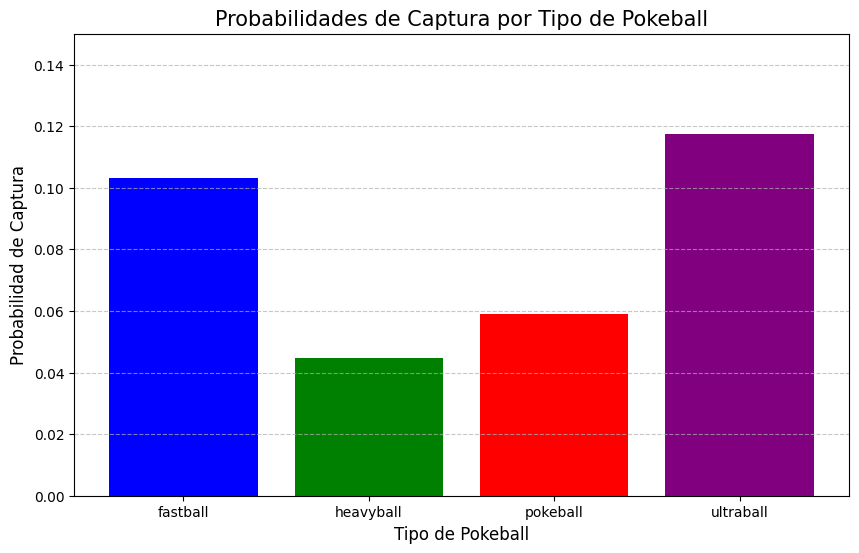

In [16]:
plt.figure(figsize=(10,6))
plt.bar(pokeballs, probabilidades, color=['blue', 'green', 'red', 'purple'])
plt.title('Probabilidades de Captura por Tipo de Pokeball', fontsize=15)
plt.xlabel('Tipo de Pokeball', fontsize=12)
plt.ylabel('Probabilidad de Captura', fontsize=12)
plt.ylim(0, 0.15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Ejercicio 1.b

Analizar las pokebolas respecto a las estadísticas del pokemon. Debido a nuestro conocimiento de pokemon, sabemos que solo la velocidad y el peso afectan al catch-rate.

Agrupamos por estadística y pokebola para analizar cada pokebola de forma independiente.

In [18]:
probs_w = df.groupby(['pokeball','weight',])['success'].mean()
probs_w

pokeball   weight
fastball   6.9       0.058
           9.0       0.054
           48.0      0.246
           54.0      0.230
           90.5      0.236
           130.0     0.059
           155.0     0.083
           210.0     0.059
           220.0     0.065
           235.0     0.052
           463.0     0.068
           1014.1    0.026
heavyball  6.9       0.027
           9.0       0.027
           48.0      0.035
           54.0      0.032
           90.5      0.037
           130.0     0.033
           155.0     0.082
           210.0     0.032
           220.0     0.030
           235.0     0.042
           463.0     0.077
           1014.1    0.083
pokeball   6.9       0.066
           9.0       0.057
           48.0      0.073
           54.0      0.060
           90.5      0.058
           130.0     0.058
           155.0     0.077
           210.0     0.046
           220.0     0.062
           235.0     0.062
           463.0     0.053
           1014.1    0.035
ultraball 

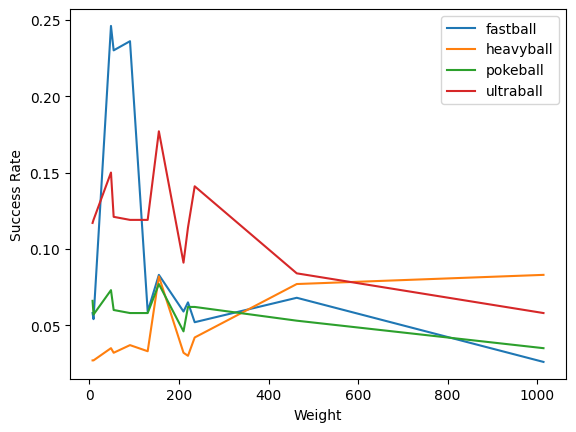

In [20]:

df_reset = probs_w.reset_index()
pokeballs = df_reset['pokeball'].unique()

for pokeball in pokeballs:
    subset = df_reset[df_reset['pokeball'] == pokeball]
    plt.plot(subset['weight'], subset['success'], label=pokeball)

plt.xlabel('Weight')
plt.ylabel('Success Rate')
plt.legend()
plt.show()

Se puede observar que para pesos pequeños, el tipo de pokebola no parece tener un efecto muy claro. La Ultraball parece tene un success rate constantemente superior al resto, pero a medida que el peso aumenta, la HeavyBall se vuelve la mejor opción.

In [14]:
probs_s = df.groupby(['pokeball','speed',]).mean()
probs_s

C:\Users\juana\AppData\Local\Temp\ipykernel_9852\526806195.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  probs_s = df.groupby(['pokeball','speed',]).mean()


success  weight  catch_rate
pokeball  speed                             
fastball  30       0.026  1014.1      0.0326
          43       0.054     9.0      0.0586
          45       0.058     6.9      0.0586
          55       0.059   130.0      0.0586
          60       0.065   220.0      0.0586
          70       0.068   463.0      0.0586
          80       0.059   210.0      0.0586
          81       0.052   235.0      0.0586
          95       0.083   155.0      0.0977
          100      0.236    90.5      0.2344
          120      0.246    48.0      0.2604
          130      0.230    54.0      0.2344
heavyball 30       0.083  1014.1      0.0846
          43       0.027     9.0      0.0326
          45       0.027     6.9      0.0326
          55       0.033   130.0      0.0326
          60       0.030   220.0      0.0326
          70       0.077   463.0      0.0846
          80       0.032   210.0      0.0326
          81       0.042   235.0      0.0326
          95       0.082   155.0      0.0716
          100      0.037    90.5      0.0326
          120      0.035    48.0      0.0391
          130      0.032    54.0      0.0326
pokeball  30       0.035  1014.1      0.0326
          43       0.057     9.0      0.0586
          45       0.066     6.9      0.0586
          55       0.058   130.0      0.0586
          60       0.062   220.0      0.0586
          70       0.053   463.0      0.0586
          80       0.046   210.0      0.0586
          81       0.062   235.0      0.0586
          95       0.077   155.0      0.0977
          100      0.058    90.5      0.0586
          120      0.073    48.0      0.0651
          130      0.060    54.0      0.0586
ultraball 30       0.058  1014.1      0.0651
          43       0.119     9.0      0.1172
          45       0.117     6.9      0.1172
          55       0.119   130.0      0.1172
          60       0.114   220.0      0.1172
          70       0.084   463.0      0.1172
          80       0.091   210.0      0.1172
          81       0.141   235.0      0.1172
          95       0.177   155.0      0.1953
          100      0.119    90.5      0.1172
          120      0.150    48.0      0.1302
          130      0.121    54.0      0.1172

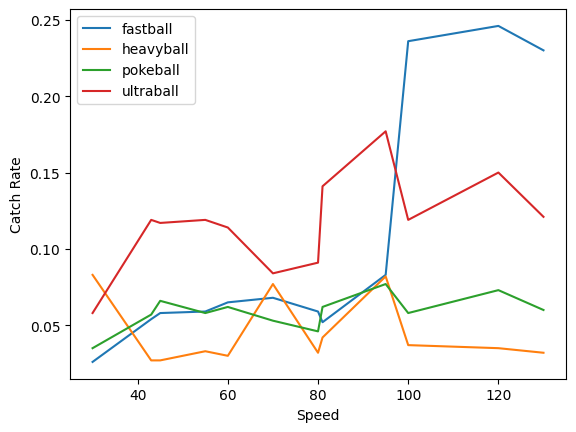

In [15]:

df_reset = probs_s.reset_index()
pokeballs = df_reset['pokeball'].unique()

for pokeball in pokeballs:
    subset = df_reset[df_reset['pokeball'] == pokeball]
    plt.plot(subset['speed'], subset['success'], label=pokeball)

plt.xlabel('Speed')
plt.ylabel('Success Rate')
plt.legend()
plt.show()


La velocidad tiene un efecto muy similar al peso, donde para velocidades pequeñas los datos no muestran una pokebola preferible (ademas de la Ultraball) pero a medida que aumenta se vuelve idea utilizar la Fastball.

También cabe notar que parece haber una pequeña correlación entre poca velocidad y mucho peso que no estamos investigando.